In [ ]:
# Ejercicio 4: Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2
# con el nuevo arreglo muestre los nodos y vértices del grafo

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io
from matplotlib import animation
from IPython.display import HTML

In [5]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"

In [6]:
mat_json = scipy.io.loadmat(mat_path)

In [7]:
mat_dict = {k: v for k, v in mat_json.items() if k[0] != '_'}
df = pd.DataFrame(mat_dict['Coactivation_matrix'])

In [8]:
# la hacemos binaria
matbinaria = (mat_dict['Coactivation_matrix'] > 0.2).astype(int)
df_good = pd.DataFrame(matbinaria)

In [9]:
#Adj matrix en NetworkX
G = nx.from_pandas_adjacency(df_good, create_using=nx.DiGraph)

In [10]:
#establecemos coordenadas
x = mat_dict['Coord'][:, 0]
y = mat_dict['Coord'][:, 1]
z = mat_dict['Coord'][:, 2]

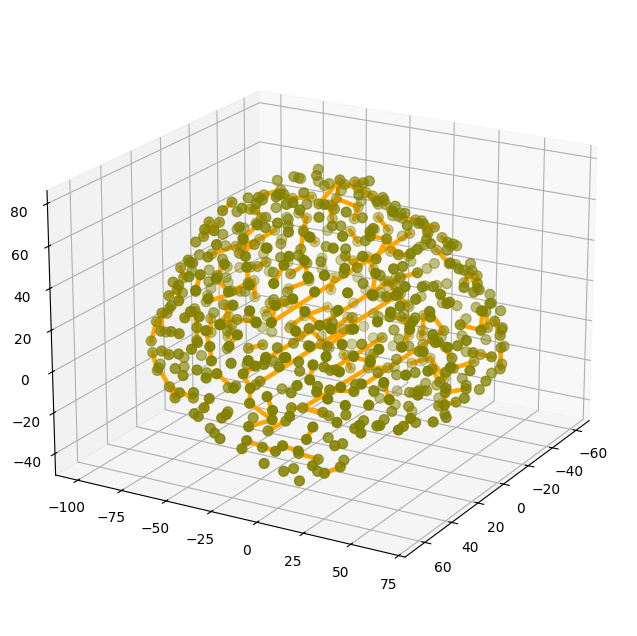

In [15]:
# ploteamos

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(x, y, z, color='olive', s=50)

for edge in G.edges(data=True):
    i, j = edge[0], edge[1]
    weight = edge[2].get('weight', 0)

    if weight > 0:
        ax.plot(
            [x[i], x[j]],
            [y[i], y[j]],
            [z[i], z[j]],
            color="orange", alpha=0.5 + 0.5 * weight, lw=1 + 2 * weight
        )

ax.view_init(elev=20., azim=30)

plt.show()